<a href="https://colab.research.google.com/github/silver-ye/base/blob/main/_Pandas_%ED%95%9C%EB%B2%88%EC%97%90_%EC%A0%9C%EB%8C%80%EB%A1%9C_%EB%B0%B0%EC%9A%B0%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas 한번에 제대로 배우기




---



- **출처**: Pandas 한번에 끝내기 - 데이터 과학의 핵심 패키지, 데이터 처리, 연산, 집계 (이수안컴퓨터연구소)
url = https://www.youtube.com/watch?v=lG8pEwvYwCw


Pandas 특징
- 부동 소수점이 아닌 데이터뿌난 아니라 부동 소숫점 데이터에서도 결측데이터를 쉽게 처리
- 크기 변이성: DataFrame 및 고차원 객체에서 열을 삽입 및 삭제 가능
- 자동 및 명시적 데이터 정렬: 객체를 라벨 집합에 명시적으로 정렬하거나, 사용자가 라벨을 무시하고 Series, DataFrame등의 계산에서 자동으로 데이터 조정 가능
- 직관적인 데이터 세트 병합 및 피벗


In [ ]:
# pandas는 numpy를 기반으로 만들어짐
import numpy as np
import pandas as pd
pd.__version__

'1.1.5'

## Pandas 객체


### Series 객체

In [ ]:
s = pd.Series([0, 0.25, 0.5, 0.75, 1.0])
s

0    0.00
1    0.25
2    0.50
3    0.75
4    1.00
dtype: float64

In [ ]:
# value값만 보기
s.values

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [ ]:
# index값만 보기
s.index

RangeIndex(start=0, stop=5, step=1)

In [ ]:
# 개별 접근이 가능
s[1]

0.25

In [ ]:
# 슬라이싱도 가능
s[1:4]

1    0.25
2    0.50
3    0.75
dtype: float64

In [ ]:
# 인덱스를 지정해서 값을 주기가 가능하다.
s = pd.Series([0, 0.25, 0.5, 0.75, 1.0], 
              index=['a', 'b', 'c', 'd', 'e'])
s


a    0.00
b    0.25
c    0.50
d    0.75
e    1.00
dtype: float64

In [ ]:
s['c']

0.5

In [ ]:
s[['c', 'd', 'e']]

c    0.50
d    0.75
e    1.00
dtype: float64

In [ ]:
# in도 사용 가능
'b' in s

True

In [ ]:
s = pd.Series([0, 0.25, 0.5, 0.75, 1.0],
              index = [2, 4, 6, 8, 10])
s

2     0.00
4     0.25
6     0.50
8     0.75
10    1.00
dtype: float64

In [ ]:
s[4]

0.25

In [ ]:
s[2:]

6     0.50
8     0.75
10    1.00
dtype: float64

In [ ]:
# unique한 값만 출력하는데, 현재는 다 unique값이기에 전체가 출력됨
s.unique()

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [ ]:
# count를 사용하기
# 현재는 다 값이 하나여서 1로 표시된다.
s.value_counts()

1.00    1
0.75    1
0.50    1
0.25    1
0.00    1
dtype: int64

In [ ]:
# 값이 어디에 들었는지 블리언 형태로 나타낸다.
s.isin([0.25, 0.75])

2     False
4      True
6     False
8      True
10    False
dtype: bool

In [ ]:
# tuple 값을 이용하기
pop_tuple = {'서울특별시' : 9720846,
          '부산광역시' : 3484423,
          '인천광역시' : 2947217,
          '대구광역시' : 2427954,
          '대전광역시' : 1471040,
          '광주광역시' : 145048}
population = pd.Series(pop_tuple)
population


서울특별시    9720846
부산광역시    3484423
인천광역시    2947217
대구광역시    2427954
대전광역시    1471040
광주광역시     145048
dtype: int64

In [ ]:
population['서울특별시']

9720846

In [ ]:
# 슬라이싱도 가능
population['서울특별시':'인천광역시']

서울특별시    9720846
부산광역시    3484423
인천광역시    2947217
dtype: int64

### DataFrame 객체

In [ ]:
# Series는 하나의 단일한 형태의 객체를 가짐
# DataFrame은 여러 컬럼이 들어간 2차원성 특징을 가짐
# 알아서 비어있는 값을 인식하고 누락값을 NaN으로 표시한다.
pd.DataFrame([{'A':2, 'B':4, 'D':5}, {'A':4, 'B':5, 'C':7}])

,A,B,D,C
0,2,4,5.0,NaN
1,4,5,NaN,7.0


In [ ]:
# 랜덤값을 가지는 데이터프레임 생성
pd.DataFrame(np.random.rand(5, 5),
             columns=['A', 'B', 'C', 'D', 'E'],
             index=[1, 2, 3, 4, 5])

,A,B,C,D,E
1,0.742631,0.962226,0.491794,0.814419,0.674566
2,0.796250,0.115837,0.369541,0.597121,0.468266
3,0.207319,0.770492,0.225574,0.508611,0.552883
4,0.009875,0.017057,0.107123,0.377630,0.983374
5,0.438938,0.316649,0.852272,0.800871,0.600810


In [ ]:
male_tuple = {'서울특별시' : 4732275,
              '부산광역시' : 1668618,
              '인천광역시' : 1476813,
              '대구광역시' : 1198815,
              '대전광역시' : 774441,
              '광주광역시' : 720060}
male = pd.Series(male_tuple)
male

서울특별시    4732275
부산광역시    1668618
인천광역시    1476813
대구광역시    1198815
대전광역시     774441
광주광역시     720060
dtype: int64

In [ ]:
female_tuple = {'서울특별시' : 4988571,
              '부산광역시' : 1735885,
              '인천광역시' : 1470404,
              '대구광역시' : 1229139,
              '대전광역시' : 736599,
              '광주광역시' : 734988}
female = pd.Series(female_tuple)
female

서울특별시    4988571
부산광역시    1735885
인천광역시    1470404
대구광역시    1229139
대전광역시     736599
광주광역시     734988
dtype: int64

In [ ]:
# 결합을 통해서 한 컬럼이 하나의 시리즈를 구성
korea_df = pd.DataFrame({'인구수': population,
                         '남자인구수': male,
                         '여자인구수': female})
korea_df

,인구수,남자인구수,여자인구수
서울특별시,9720846,4732275,4988571
부산광역시,3484423,1668618,1735885
인천광역시,2947217,1476813,1470404
대구광역시,2427954,1198815,1229139
대전광역시,1471040,774441,736599
광주광역시,145048,720060,734988


In [ ]:
korea_df.index

Index(['서울특별시', '부산광역시', '인천광역시', '대구광역시', '대전광역시', '광주광역시'], dtype='object')

In [ ]:
korea_df.columns

Index(['인구수', '남자인구수', '여자인구수'], dtype='object')

In [ ]:
# 여자인구수만 보기
korea_df['여자인구수']

서울특별시    4988571
부산광역시    1735885
인천광역시    1470404
대구광역시    1229139
대전광역시     736599
광주광역시     734988
Name: 여자인구수, dtype: int64

In [ ]:
# 서울특별시 ~ 인천광역시
korea_df['서울특별시' : '인천광역시']

,인구수,남자인구수,여자인구수
서울특별시,9720846,4732275,4988571
부산광역시,3484423,1668618,1735885
인천광역시,2947217,1476813,1470404


### Index 객체


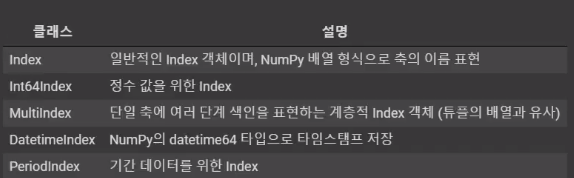

In [ ]:
# 정수값들을 넣어서 int64index가 됨
idx = pd.Index([2, 4, 6, 8, 10])
idx

Int64Index([2, 4, 6, 8, 10], dtype='int64')

In [ ]:
idx[1]

4

In [ ]:
idx[1:2:2]

Int64Index([4], dtype='int64')

In [ ]:
idx[-1::]

Int64Index([10], dtype='int64')

In [ ]:
# step을 줘서 2씩 넘어가기
idx[::2]

Int64Index([2, 6, 10], dtype='int64')

In [ ]:
print(idx)
# 값을 나타냄
print(idx.size)
# 1차원의 구조인지 알 수 있음
print(idx.shape)
# 11차원이라서 1
print(idx.ndim)
# 정수가 들어가서 int64
print(idx.dtype)

Int64Index([2, 4, 6, 8, 10], dtype='int64')
5
(5,)
1
int64


#### Index 연산

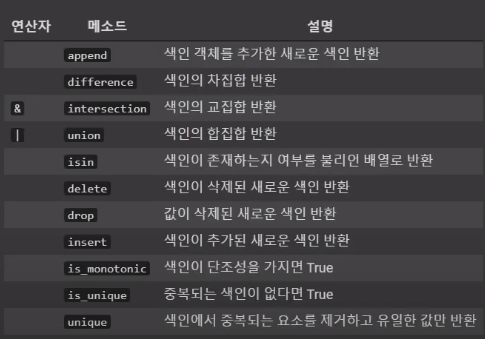

In [ ]:
idx1 = pd.Index([1, 2, 4, 6, 8])
idx2 = pd.Index([2, 4, 5, 6, 7])
# 2개를 결합
print(idx1.append(idx2))
# 차집합
print(idx1.difference(idx2))
# 값이 마이너스
print(idx1 - idx2)
# 교집합
print(idx1.intersection(idx2))
print(idx1 & idx2)
# 중복을 뺀 합집합
print(idx1.union(idx2))
print(idx1 | idx2)
# 값을 빼기
print(idx1.delete(0))
print(idx1.drop(1))
# 여집합
print(idx1 ^ idx2)

Int64Index([1, 2, 4, 6, 8, 2, 4, 5, 6, 7], dtype='int64')
Int64Index([1, 8], dtype='int64')
Int64Index([-1, -2, -1, 0, 1], dtype='int64')
Int64Index([2, 4, 6], dtype='int64')
Int64Index([2, 4, 6], dtype='int64')
Int64Index([1, 2, 4, 5, 6, 7, 8], dtype='int64')
Int64Index([1, 2, 4, 5, 6, 7, 8], dtype='int64')
Int64Index([2, 4, 6, 8], dtype='int64')
Int64Index([2, 4, 6, 8], dtype='int64')
Int64Index([1, 5, 7, 8], dtype='int64')




---



## 인덱싱(Indexing)

In [ ]:
s = pd.Series([0, 0.25, 0.5, 0.75, 1.0],
              index = ['a', 'b', 'c', 'd', 'e'])
s

a    0.00
b    0.25
c    0.50
d    0.75
e    1.00
dtype: float64

In [ ]:
s['b']

0.25

In [ ]:
'b' in s

True

In [ ]:
# 해당하는 인덱스값을 알 수 있음
s.keys()

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [ ]:
# items는 zip으로 묶여서 오니 리스트로 물어줘야함
s.items()
list(s.items())

[('a', 0.0), ('b', 0.25), ('c', 0.5), ('d', 0.75), ('e', 1.0)]

In [ ]:
s['f'] = 1.25
s

a    0.00
b    0.25
c    0.50
d    0.75
e    1.00
f    1.25
dtype: float64

In [ ]:
# 슬라이싱 가능
s['a' : 'd']

a    0.00
b    0.25
c    0.50
d    0.75
dtype: float64

In [ ]:
# 숫자로도 슬라이싱 가능
s[0:4]

a    0.00
b    0.25
c    0.50
d    0.75
dtype: float64

In [ ]:
# 특정 조건을 주어서 해당하는 값만 뽑기
s[(s > 0.4) & (s < 0.8)]

c    0.50
d    0.75
dtype: float64

In [ ]:
# 인덱스값으로만 부분 출력 가능
s[['a', 'c', 'e']]

a    0.0
c    0.5
e    1.0
dtype: float64

### Series 인덱싱

In [ ]:
s = pd.Series(['a', 'b', 'c', 'd', 'e'],
              index = [1,3, 5, 7, 9])
s

1    a
3    b
5    c
7    d
9    e
dtype: object

In [ ]:
s[1]

'a'

In [ ]:
s[2:4]

5    c
7    d
dtype: object

In [ ]:
# iloc는 정수로 되서 지정해준 인덱스가 아닌 원래 인덱스값을 받아서 b가 나옴
s.iloc[1]

'b'

In [ ]:
s.iloc[2:4]

5    c
7    d
dtype: object

In [ ]:
# 인덱스를 재구성
s.reindex(range(10))

0    NaN
1      a
2    NaN
3      b
4    NaN
5      c
6    NaN
7      d
8    NaN
9      e
dtype: object

In [ ]:
# NaN값에 method = 'bfill'을 사용해서 그전에 값을 받음
s.reindex(range(10), method = 'bfill')

0    a
1    a
2    b
3    b
4    c
5    c
6    d
7    d
8    e
9    e
dtype: object

### DataFrame 인덱싱


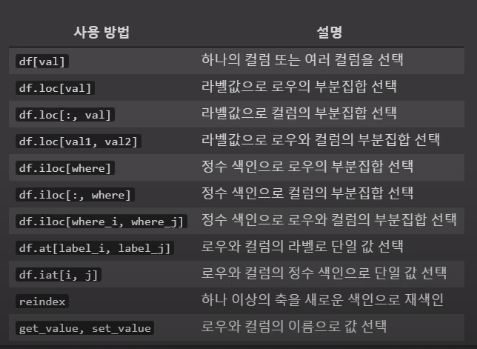

In [ ]:
korea_df

,인구수,남자인구수,여자인구수
서울특별시,9720846,4732275,4988571
부산광역시,3484423,1668618,1735885
인천광역시,2947217,1476813,1470404
대구광역시,2427954,1198815,1229139
대전광역시,1471040,774441,736599
광주광역시,145048,720060,734988


In [ ]:
korea_df['남자인구수']

서울특별시    4732275
부산광역시    1668618
인천광역시    1476813
대구광역시    1198815
대전광역시     774441
광주광역시     720060
Name: 남자인구수, dtype: int64

In [ ]:
# .을 통해서도 가져올 수 있음
korea_df.남자인구수

서울특별시    4732275
부산광역시    1668618
인천광역시    1476813
대구광역시    1198815
대전광역시     774441
광주광역시     720060
Name: 남자인구수, dtype: int64

In [ ]:
korea_df.여자인구수

서울특별시    4988571
부산광역시    1735885
인천광역시    1470404
대구광역시    1229139
대전광역시     736599
광주광역시     734988
Name: 여자인구수, dtype: int64

In [ ]:
korea_df['남녀비율'] = (korea_df['남자인구수'] * 100 / korea_df['여자인구수'])

In [ ]:
korea_df.남녀비율

서울특별시     94.862336
부산광역시     96.124916
인천광역시    100.435867
대구광역시     97.532907
대전광역시    105.137395
광주광역시     97.968946
Name: 남녀비율, dtype: float64

In [ ]:
korea_df.values

array([[9.72084600e+06, 4.73227500e+06, 4.98857100e+06, 9.48623363e+01],
       [3.48442300e+06, 1.66861800e+06, 1.73588500e+06, 9.61249161e+01],
       [2.94721700e+06, 1.47681300e+06, 1.47040400e+06, 1.00435867e+02],
       [2.42795400e+06, 1.19881500e+06, 1.22913900e+06, 9.75329072e+01],
       [1.47104000e+06, 7.74441000e+05, 7.36599000e+05, 1.05137395e+02],
       [1.45048000e+05, 7.20060000e+05, 7.34988000e+05, 9.79689464e+01]])

In [ ]:
korea_df.T

,서울특별시,부산광역시,인천광역시,대구광역시,대전광역시,광주광역시
인구수,9.720846e+06,3.484423e+06,2.947217e+06,2.427954e+06,1.471040e+06,145048.000000
남자인구수,4.732275e+06,1.668618e+06,1.476813e+06,1.198815e+06,7.744410e+05,720060.000000
여자인구수,4.988571e+06,1.735885e+06,1.470404e+06,1.229139e+06,7.365990e+05,734988.000000
남녀비율,9.486234e+01,9.612492e+01,1.004359e+02,9.753291e+01,1.051374e+02,97.968946


In [ ]:
korea_df.values[0]

array([9.72084600e+06, 4.73227500e+06, 4.98857100e+06, 9.48623363e+01])

In [ ]:
korea_df['인구수']

서울특별시    9720846
부산광역시    3484423
인천광역시    2947217
대구광역시    2427954
대전광역시    1471040
광주광역시     145048
Name: 인구수, dtype: int64

In [ ]:
korea_df.loc[:'인천광역시', :'남자인구수']

,인구수,남자인구수
서울특별시,9720846,4732275
부산광역시,3484423,1668618
인천광역시,2947217,1476813


In [ ]:
# 여자인구수가 1000000이상
korea_df.loc[(korea_df.여자인구수 > 1000000)]

,인구수,남자인구수,여자인구수,남녀비율
서울특별시,9720846,4732275,4988571,94.862336
부산광역시,3484423,1668618,1735885,96.124916
인천광역시,2947217,1476813,1470404,100.435867
대구광역시,2427954,1198815,1229139,97.532907


In [ ]:
# 인수수가 2000000 이하
korea_df.loc[(korea_df.인구수 < 2000000)]

,인구수,남자인구수,여자인구수,남녀비율
대전광역시,1471040,774441,736599,105.137395
광주광역시,145048,720060,734988,97.968946


In [ ]:
# 인구수가 2500000 이상
korea_df.loc[(korea_df.인구수 > 2500000)]

,인구수,남자인구수,여자인구수,남녀비율
서울특별시,9720846,4732275,4988571,94.862336
부산광역시,3484423,1668618,1735885,96.124916
인천광역시,2947217,1476813,1470404,100.435867


In [ ]:
korea_df.loc[korea_df.남녀비율 > 100]

,인구수,남자인구수,여자인구수,남녀비율
인천광역시,2947217,1476813,1470404,100.435867
대전광역시,1471040,774441,736599,105.137395


In [ ]:
# 인구수가 250000 이상이고 남녀비율이 100이상
korea_df.loc[(korea_df.인구수 > 250000) & (korea_df.남녀비율 > 100)]

,인구수,남자인구수,여자인구수,남녀비율
인천광역시,2947217,1476813,1470404,100.435867
대전광역시,1471040,774441,736599,105.137395


In [ ]:
# 컬럼의 이름 혹은 인덱스로도 접근이 가능
korea_df.iloc[:3, :2]

,인구수,남자인구수
서울특별시,9720846,4732275
부산광역시,3484423,1668618
인천광역시,2947217,1476813


### 다중 인덱싱(Multi Indexing)

* 1차원의 Series와 2차원의 DataFrame 객체를 넘어 3차원, 4차원 이상의 고차원 데이터 처리
* 단일 인덱스 내에 여러 인덱스를 포함하는 다중 인덱싱

#### 다중 인덱스 Series

In [ ]:
korea_df

,인구수,남자인구수,여자인구수,남녀비율
서울특별시,9720846,4732275,4988571,94.862336
부산광역시,3484423,1668618,1735885,96.124916
인천광역시,2947217,1476813,1470404,100.435867
대구광역시,2427954,1198815,1229139,97.532907
대전광역시,1471040,774441,736599,105.137395
광주광역시,145048,720060,734988,97.968946


In [ ]:
# 2010년과 2020년이 다 들어가있음
idx_tuples = [('서울특별시', 2010), ('서울특별시', 2020),
              ('부산광역시', 2010), ('부산광역시', 2020),
              ('인천광역시', 2010), ('인천광역시', 2020),
              ('대구광역시', 2010), ('대구광역시', 2020),
              ('대전광역시', 2010), ('대전광역시', 2020),
              ('광주광역시', 2010), ('광주광역시', 2020)]
idx_tuples

[('서울특별시', 2010),
 ('서울특별시', 2020),
 ('부산광역시', 2010),
 ('부산광역시', 2020),
 ('인천광역시', 2010),
 ('인천광역시', 2020),
 ('대구광역시', 2010),
 ('대구광역시', 2020),
 ('대전광역시', 2010),
 ('대전광역시', 2020),
 ('광주광역시', 2010),
 ('광주광역시', 2020)]

In [ ]:
# 총 인구수를 넣음
# 멀티인덱스가 아니라 중복된 형태의 값이 페어 형태
pop_tuples = [10312545, 9720846,
              2567910, 3404423,
              2758296, 2947217, 
              2511676, 2427954,
              1503664, 1471040,
              1454636, 1455048]
population = pd.Series(pop_tuples, idx_tuples)
population

(서울특별시, 2010)    10312545
(서울특별시, 2020)     9720846
(부산광역시, 2010)     2567910
(부산광역시, 2020)     3404423
(인천광역시, 2010)     2758296
(인천광역시, 2020)     2947217
(대구광역시, 2010)     2511676
(대구광역시, 2020)     2427954
(대전광역시, 2010)     1503664
(대전광역시, 2020)     1471040
(광주광역시, 2010)     1454636
(광주광역시, 2020)     1455048
dtype: int64

In [ ]:
# 다른 방법으로 넣기
# 멀티인덱싱 사용하기
midx = pd.MultiIndex.from_tuples(idx_tuples)
midx

MultiIndex([('서울특별시', 2010),
            ('서울특별시', 2020),
            ('부산광역시', 2010),
            ('부산광역시', 2020),
            ('인천광역시', 2010),
            ('인천광역시', 2020),
            ('대구광역시', 2010),
            ('대구광역시', 2020),
            ('대전광역시', 2010),
            ('대전광역시', 2020),
            ('광주광역시', 2010),
            ('광주광역시', 2020)],
           )

In [ ]:
# 멀티인덱싱으로 만들기
population = population.reindex(midx)
population

서울특별시  2010    10312545
       2020     9720846
부산광역시  2010     2567910
       2020     3404423
인천광역시  2010     2758296
       2020     2947217
대구광역시  2010     2511676
       2020     2427954
대전광역시  2010     1503664
       2020     1471040
광주광역시  2010     1454636
       2020     1455048
dtype: int64

In [ ]:
# 2010 다 보기
population[:, 2010]

서울특별시    10312545
부산광역시     2567910
인천광역시     2758296
대구광역시     2511676
대전광역시     1503664
광주광역시     1454636
dtype: int64

In [ ]:
# 대전광역시 2010, 2020년 다 보기
population['대전광역시', :]

2010    1503664
2020    1471040
dtype: int64

In [ ]:
# unstack()
# 다중인덱스로 만든 시리즈인 population을 DataFrame으로 출력
korea_mdf = population.unstack()
korea_mdf

,2010,2020
광주광역시,1454636,1455048
대구광역시,2511676,2427954
대전광역시,1503664,1471040
부산광역시,2567910,3404423
서울특별시,10312545,9720846
인천광역시,2758296,2947217


In [ ]:
# stack(): DataFrame을 다중인덱스로 변환
korea_mdf.stack()

광주광역시  2010     1454636
       2020     1455048
대구광역시  2010     2511676
       2020     2427954
대전광역시  2010     1503664
       2020     1471040
부산광역시  2010     2567910
       2020     3404423
서울특별시  2010    10312545
       2020     9720846
인천광역시  2010     2758296
       2020     2947217
dtype: int64

In [ ]:
# 남자인구 데이터 생성
male_tuples = [5111259, 5732275, 
              1773170, 1668618,
              1390356, 1476813,
              1255245, 1198815,
              753648, 734441, 
              721780, 720560]
male_tuples

[5111259,
 5732275,
 1773170,
 1668618,
 1390356,
 1476813,
 1255245,
 1198815,
 753648,
 734441,
 721780,
 720560]

In [ ]:
koea_mdf = pd.DataFrame({'총 인구수': population,
                        '남자총인구수' : male_tuples})

In [ ]:
52:41

#### 다중 인덱스 생성

#### 인덱싱 및 슬라이싱

#### 다중 인덱스 재정렬

## 데이터 연산

### 연산자 범용 함수


#### add()

#### sub() / subtract()

#### mul() / multply()




#### truediv() /  div() / divide() / floordiv()

#### mod()

#### pow()

### 정렬(Sort)

### 순위(Ranking)


### 고성능 연산

## 데이터 결합

### Concat() / Append()

### 병합과 조인

## 데이터 집계와 그룹 연산

#### 집계 연산(Aggregation)


### GroupBy 연산

### 피벗 테이블(Pivot Table)


### 범주형(Categorical) 데이터


## 문자열 연산

#### 문자열 연산자

#### 기타 연산자


#### 정규표현식


## 시계열 처리

#### 시계열 데이터 구조


### 시계열 기본

### 주기와 오프셋


### 시프트(Shift)

### 시간대 처리

* 국제표준시(Coordinated Universal Time, UTC)를 기준으로 떨어진 거리만큼 오프셋으로 시간대 처리
* 전 세계의 시간대 정보를 모아놓은 올슨 데이터베이스를 활용한 라이브러리인 `pytz` 사용

### 기간과 기간 연산

### 리샘플링(Resampling)

* 리샘플링(Resampling): 시계열의 빈도 변환
* 다운샘플링(Down sampling): 상위 빈도 데이터를 하위 빈도 데이터로 집계
* 업샘플링(Up sampling): 하위 빈도 데이터를 상위 빈도 데이터로 집계

### 무빙 윈도우(Moving Window)

## 데이터 읽기 및 저장


### 텍스트 파일 읽기/쓰기

### 이진 데이터 파일 읽기/쓰기

## 데이터 정제

### 누락값 처리

* 대부분의 실제 데이터들은 정제되지 않고 누락값들이 존재
* 서로 다른 데이터들은 다른 형태의 결측을 가짐
* 결측 데이터는 `null`, `NaN`, `NA`로 표기

#### None: 파이썬 누락 데이터

#### NaN: 누락된 수치 데이터

#### Null 값 처리


### 중복 제거

### 값 치환

## 참고문헌

* Pandas 사이트: https://pandas.pydata.org/
* Jake VanderPlas, "Python Data Science Handbook", O'Reilly
* Wes Mckinney, "Python for Data Analysis", O'Reilly